To calculate the degree exponent of the hierarchical network shown in the image, we need to perform the following steps:

1. **Extract Network Data**:
   Analyze the hierarchical structure in terms of its degree distribution (number of connections each node has). This involves counting the connections for each node.

2. **Fit the Degree Distribution**:
   Represent the degree distribution \(P(k)\) (the probability of a node having \(k\) connections) on a log-log plot. 

3. **Determine Degree Exponent (\(\gamma\))**:
   The degree distribution of many hierarchical networks follows a power law: \(P(k) \sim k^{-\gamma}\). The degree exponent \(\gamma\) is the slope of the distribution in the log-log plot.

Since the image does not directly provide the degree distribution, I can attempt to calculate it if you provide more information about the structure (e.g., adjacency matrix, total nodes, and connections) or describe how nodes and connections are distributed in the hierarchy. Alternatively, we can analyze the structure visually for approximate distributions.

Let me know how you'd like to proceed!

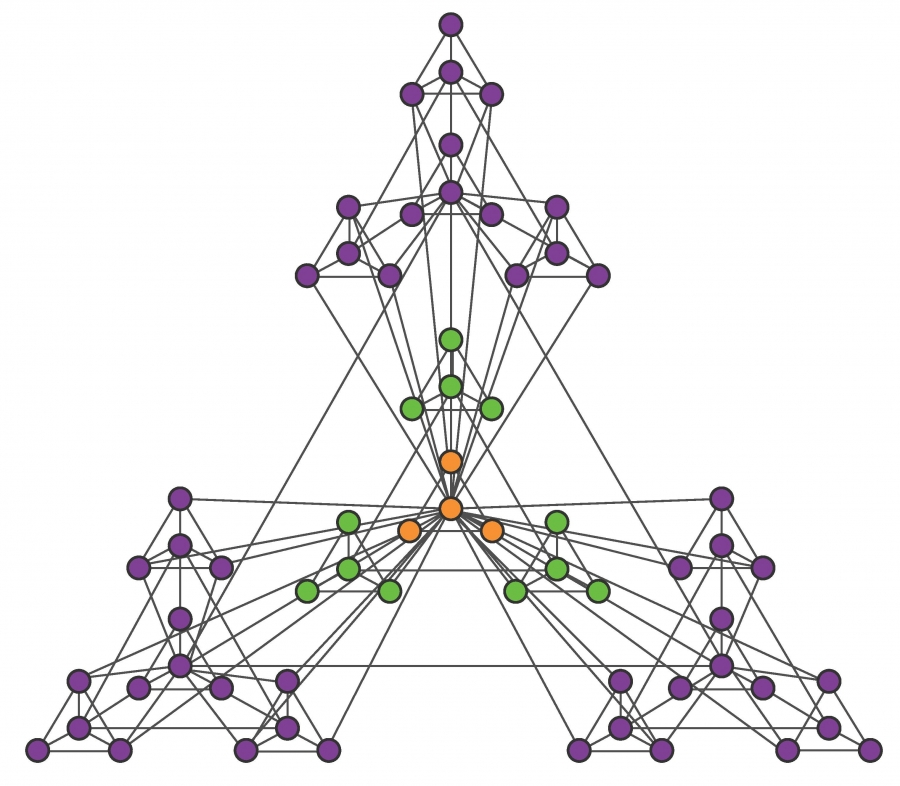

**Below is a self-contained sketch of the main steps and results** for the three questions posed, following (and paraphrasing) standard discussions from the literature (e.g., Barabási’s *Network Science*, Chapter 9).

---

## 1. **Communities on a Circle**

### Setup
1. We have a ring (circle) of \(N\) nodes, each node of degree 2, hence the total number of edges is
   \[
     E = N.
   \]
2. We partition this ring into \(n_c\) **consecutive** communities (clusters), each cluster containing 
   \[
     N_c \;=\; \frac{N}{n_c}
   \]
   nodes.  

Since the nodes form a circle, each community is essentially a contiguous chain of size \(N_c\).  In each chain of \(N_c\) nodes, there are \(\,(N_c - 1)\) edges **inside** that community, ignoring the boundary edge to the next cluster (which is “cut”).

### Modularity Calculation

Recall that the standard formula for modularity \(M\) of a partition \(\{C_1, \dots, C_{n_c}\}\) is  
\[
  M 
  \;=\;
  \frac{1}{2E}\,\sum_{i,j} 
  \Bigl[
    A_{ij}\;-\;\frac{k_i\,k_j}{2E}
  \Bigr]\;\delta(C_i,C_j),
\]  
often written equivalently (for undirected, unweighted networks) in the “lumped” form
\[
  M 
  \;=\; 
  \sum_{r=1}^{n_c} 
  \Bigl[
    \frac{l_r}{E} 
    \;-\;
    \Bigl(\frac{d_r}{2E}\Bigr)^{2}
  \Bigr],
\]
where
- \(l_r\) is the number of edges **inside** community \(r\),
- \(d_r\) is the sum of the degrees of the nodes in \(r\),
- \(E\) is the total number of edges in the whole network.

#### Counting \(l_r\)
Each of the \(n_c\) communities is a contiguous chain of \(N_c\) nodes.  Inside one community,
\[
  l_r \;=\; N_c - 1.
\]
Hence, across all \(n_c\) communities,
\[
  \sum_{r=1}^{n_c} l_r 
  \;=\; 
  n_c\,\bigl(N_c - 1\bigr)
  \;=\;
  n_c\Bigl(\tfrac{N}{n_c}-1\Bigr)
  \;=\;
  N \;-\; n_c.
\]
Since \(E = N\), the fraction of edges that lie inside the communities is
\[
  \sum_{r=1}^{n_c}\,\frac{l_r}{E} \;=\; \frac{N - n_c}{N} \;=\; 1 \;-\; \frac{n_c}{N}.
\]

#### Counting \(d_r\)
Each node has degree 2, so for community \(r\) of \(N_c\) nodes,
\[
  d_r 
  \;=\; \sum_{\text{nodes }i\in r} k_i 
  \;=\; 2\,N_c.
\]
Thus,
\[
  \frac{d_r}{2E}
  \;=\;
  \frac{2\,N_c}{2\,N}
  \;=\;
  \frac{N_c}{N}
  \;=\;
  \frac{1}{n_c}.
\]
Hence
\[
  \bigl(\tfrac{d_r}{2E}\bigr)^2 
  \;=\; 
  \frac{1}{n_c^2}
  \quad
  \Longrightarrow
  \quad
  \sum_{r=1}^{n_c} \bigl(\tfrac{d_r}{2E}\bigr)^2
  \;=\;
  n_c \,\frac{1}{n_c^2}
  \;=\;
  \frac{1}{n_c}.
\]

#### Putting it Together
Hence the modularity \(M_c\) of the partition into \(n_c\) consecutive clusters is

\[
  M_c 
  \;=\; 
  \underbrace{
    \bigl(1 - \tfrac{n_c}{N}\bigr)
  }_{\sum l_r/E}
  \;-\;
  \underbrace{
    \tfrac{1}{n_c}
  }_{\sum(d_r/2E)^2}
  \;=\;
  1 \;-\; \frac{n_c}{N} \;-\; \frac{1}{n_c}.
\]

### Finding the Best Partition
To find the \(n_c\) that **maximizes** \(M_c\), we can treat \(n_c\) as a continuous variable and set the derivative to zero:

\[
  f(n_c) 
  \;=\;
  1 \;-\; \frac{n_c}{N} \;-\; \frac{1}{n_c}.
\]
\[
  \frac{d f}{d n_c}
  \;=\;
  -\,\frac{1}{N} 
  \;+\; 
  \frac{1}{n_c^2} 
  \;=\; 0
  \quad
  \Longrightarrow
  \quad
  \frac{1}{n_c^2} \;=\; \frac{1}{N}
  \quad
  \Longrightarrow
  \quad
  n_c \;=\; \sqrt{N}.
\]
Hence **the optimal number of communities** is on the order of \(\sqrt{N}\).  In practice, one chooses the integer \(n_c\) that maximizes \(M_c\).  

---

## 2. **Modularity Resolution Limit**

### Setup: A Ring of Cliques
We now consider a ring of \(n_c\) fully connected subgraphs (“cliques”), each having \(m\) nodes (so each clique has
\(\tfrac{m(m-1)}{2}\) edges).  These \(n_c\) cliques are arranged in a ring, and **each pair of neighboring cliques is connected by exactly one edge**.  

Hence:
1. **Total edges inside cliques**: 
   \[
     n_c \,\times\, \frac{m(m-1)}{2}.
   \]
2. **Edges between neighboring cliques**: \(n_c\) (since it is a ring).
3. **Total edges** \(E\) is thus
   \[
     E 
     \;=\;
     n_c \,\frac{m(m-1)}{2}
     \;+\;
     n_c.
   \]

### Two Natural Partitions
1. **\(M_{\text{single}}\):** The “obvious” partition where **each clique** is its own community.
2. **\(M_{\text{pairs}}\):** A partition in which **pairs of adjacent cliques** are merged into a single community.  

The well-known **resolution limit** phenomenon of modularity says that, when \(n_c\) is large enough, merging communities can *increase* modularity even though it seems “incorrect” from an intuitive standpoint.  One finds that for large \(n_c\),  
\[
  M_{\text{pairs}} \;>\; M_{\text{single}},
\]
causing the standard Louvain (or similar) modularity optimization to “miss” the intuitive partition that each clique should stand alone.

### The Critical Inequality
A typical derivation (see *Barabási, Network Science*, §9.4.2 or Fortunato & Barthélemy 2007) shows that if  
\[
  n_c \;<\; 2L,
\]
then the maximum-modularity partition matches our intuitive community assignment (each clique is alone).  Conversely, for  
\[
  n_c \;\ge\; 2L
\]
the algorithm tends to merge neighboring cliques into bigger blocks.  

Here \(L\) is often taken to be on the order of the number of edges in each clique, plus the ring-like connections:
\[
  L \;=\; n_c\,\frac{m(m-1)}{2} \;+\; n_c \;=\; E, 
\]
or a similar parameter capturing the size of the communities relative to the entire ring.  The upshot is:

> - **Only if** \(n_c < 2L\) do we recover the partition in which each clique is its own community.  
> - **Once** \(n_c \ge 2L,\) merging neighboring cliques yields higher modularity and the algorithm’s “best” partition lumps them, violating our intuitive preference.

### Consequences
When the inequality is violated, the **resolution limit** sets in:
- Large networks composed of many small cliques become “unresolvable” by modularity; the optimization lumps multiple small cliques into bigger communities.
- In practice, one may need multi-scale methods (e.g. a resolution parameter, or methods beyond classic modularity) to correctly detect small “intuitive” communities in large networks.

---

## 3. **Modularity Maximum**

Finally, let us show that the modularity \(M\) in (9.12) **cannot exceed 1**.

### Key Idea
Recall the form  
\[
  M
  \;=\;
  \frac{1}{2E}\,\sum_{i,j} 
  \Bigl[
    A_{ij}\;-\;\frac{k_i\,k_j}{2E}
  \Bigr]\;\delta(C_i,C_j).
\]
We note:
1. The adjacency term \(A_{ij}\) is at most 1, and of course \(\frac{k_i k_j}{2E}\) is a positive quantity.
2. In the most “extreme” partition (all nodes in one single community), we trivially get
   \[
     \delta(C_i,C_j) = 1 \quad \forall\,i,j.
   \]
   In that case, \(\sum_{i,j} A_{ij} = 2E\) and \(\sum_{i,j} k_i k_j = (2E)^2\).  One finds that  
   \[
     M \;=\; 1 - \underbrace{\sum_r\Bigl(\tfrac{d_r}{2E}\Bigr)^2}_{\text{nonnegative}}  
     \;\;\le\;\; 1.
   \]

A more precise argument uses that for *any* partition,
\[
  \sum_{i,j}\!\delta(C_i,C_j)\,A_{ij} 
  \;\le\; 
  \sum_{i,j} A_{ij}
  \;=\; 
  2E,
  \qquad
  \sum_{i,j}\!\delta(C_i,C_j)\,\frac{k_i k_j}{2E}
  \;\ge\;
  0,
\]
and hence
\[
  M 
  \;\le\;
  \frac{1}{2E}\,\Bigl(\,2E\Bigr)
  \;=\;1.
\]
Thus the **maximum possible value** of modularity is **1**.

---

#  
**Answer Summary**

1. **Communities on a Circle**  
   - For a ring of \(N\) nodes, partitioned into \(n_c\) contiguous communities of size \(N_c = \tfrac{N}{n_c}\), the modularity is  
     \[
       M_c 
       \;=\; 
       1 \;-\;\frac{n_c}{N} \;-\;\frac{1}{n_c}.
     \]
   - Optimizing over \(n_c\) shows the best partition has \(n_c \approx \sqrt{N}\).

2. **Modularity Resolution Limit**  
   - In a ring of \(n_c\) cliques (each of size \(m\)) joined by single edges, the intuitive partition (each clique alone) has modularity \(M_{\text{single}}\).  However, merging pairs of cliques can yield \(M_{\text{pairs}}>M_{\text{single}}\) once \(n_c\) is large enough.  
   - Specifically, only if \(n_c < 2L\) (for an appropriate \(L\)) does modularity select the intuitive partition (no merging).  If \(n_c \ge 2L\), modularity “fails” to see small communities and lumps them, illustrating the **resolution limit**.

3. **Modularity Maximum**  
   - By construction, modularity \(M\) cannot exceed 1.  Indeed, the most extreme partition (all nodes in one community) yields \(M\le 1\), and no partition can surpass that bound.